In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import seaborn as sns

In [7]:
df = pd.read_csv('Advertising.csv', index_col = 0)

In [8]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
df.shape

(200, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [11]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [12]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


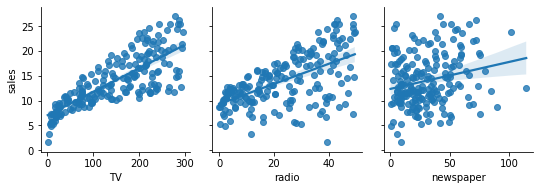

In [14]:
sns.pairplot(x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales', data = df, kind = 'reg')

In [16]:
df_num = df[['TV', 'radio', 'newspaper']]
df_cat = df['sales']

In [17]:
x = df_num
y = df_cat

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, random_state = 100)

In [20]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = lr.predict(x_test)

In [22]:
import statsmodels.api as sm
x_train_sm = x_train
x_train_sm = sm.add_constant(x_train_sm)
lr1 = sm.OLS(y_train, x_train_sm).fit()
lr1.params
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           9.97e-66
Time:                        20:40:04   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

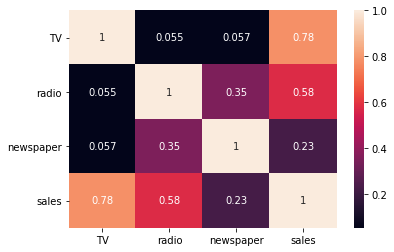

In [23]:
sns.heatmap(df.corr(), annot = True)

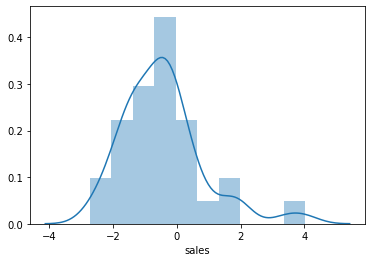

In [25]:
sns.distplot(y_pred-y_test)

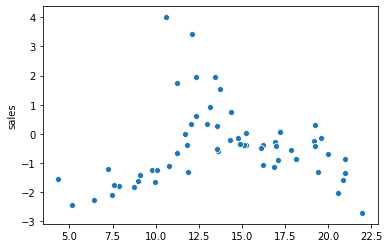

In [24]:
sns.scatterplot(x = y_pred, y = y_pred-y_test)

Text(0.5, 1.0, 'Actual(Green) vs Predicted(Yellow)')

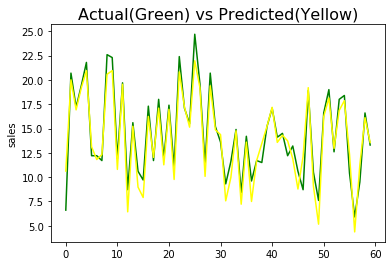

In [26]:
list_values = [ i for i in range(0,len(y_test))]
sns.lineplot(list_values, y_test, color = 'green')
sns.lineplot(list_values, y_pred, color = 'yellow')
plt.title('Actual(Green) vs Predicted(Yellow)', fontsize = 16)